<h1>Red Neuronal Convolucional</h1>
<h3>3 Capas Convolucionales + ReLU + MaxPool | 8 Filtros x Capa</h3>
<h3>2 Capas Fully Connected | 256 Neuronas x Capa</h3>
<h3>3 Salidas: Celular & Vaso & Cara</h3>

In [10]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
import math
from PIL import Image
import glob
import zipfile
import datetime
import rna_tf as rna
import reshape_img as ri
import files

In [11]:
with zipfile.ZipFile("dataset.zip","r") as zip_ref:
    zip_ref.extractall("")

<h3>Dataset de Entrenamiento</h3>

In [12]:
alto=224
ancho=224
canales=3
salidas=4
path_dataset='dataset'

In [13]:
xx=[]
dd=[]
image_list = []
im_array = np.zeros(([alto,ancho,3]))

for filename in glob.glob(path_dataset+'/train/1/*.jpg'):
    im=Image.open(filename)
    image_list.append(im)      
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized) 
    xx.append(im_array)
    dd.append([1,0,0,0]) 

for filename in glob.glob(path_dataset+'/train/2/*.jpg'):
    im=Image.open(filename)
    image_list.append(im)      
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized) 
    xx.append(im_array)
    dd.append([0,1,0,0]) 

for filename in glob.glob(path_dataset+'/train/3/*.jpg'):
    im=Image.open(filename)
    image_list.append(im)      
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized) 
    xx.append(im_array)
    dd.append([0,0,1,0]) 
    
for filename in glob.glob(path_dataset+'/train/4/*.jpg'):
    im=Image.open(filename)
    image_list.append(im)      
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized) 
    xx.append(im_array)
    dd.append([0,0,0,1])  

xxx = np.zeros([len(xx),len(xx[0]),len(xx[0][0]),len(xx[0][0][0])],dtype=np.ubyte)
ddd = np.zeros([len(dd),len(dd[0])])
xxx[:] = xx[:]
ddd[:] = dd[:]

<h3>Dataset de Test</h3>

In [14]:
xx_t=[]
dd_t=[]
image_list = []
im_array = np.zeros(([alto,ancho,3]))

for filename in glob.glob(path_dataset+'/test/1/*.jpg'):
    im=Image.open(filename)
    image_list.append(im) 
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized)  
    xx_t.append(im_array)
    dd_t.append([1,0,0,0])

for filename in glob.glob(path_dataset+'/test/2/*.jpg'):
    im=Image.open(filename)
    image_list.append(im) 
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized)  
    xx_t.append(im_array)
    dd_t.append([0,1,0,0])

for filename in glob.glob(path_dataset+'/test/3/*.jpg'):
    im=Image.open(filename)
    image_list.append(im) 
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized)  
    xx_t.append(im_array)
    dd_t.append([0,0,1,0])
    
for filename in glob.glob(path_dataset+'/test/4/*.jpg'):
    im=Image.open(filename)
    image_list.append(im) 
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized)  
    xx_t.append(im_array)
    dd_t.append([0,0,0,1])
    
xxx_t = np.zeros([len(xx_t),len(xx_t[0]),len(xx_t[0][0]),len(xx_t[0][0][0])],dtype=np.ubyte)
xxx_t[:] = xx_t[:]
ddd_t = np.zeros([len(dd_t),len(dd_t[0])])
ddd_t[:] = dd_t[:]

<h3>Dataset de Validación</h3>

In [15]:
xx_v=[]
dd_v=[]
image_list = []
im_array = np.zeros(([alto,ancho,3]))

for filename in glob.glob(path_dataset+'/valid/1/*.jpg'):
    im=Image.open(filename)
    image_list.append(im)     
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized)  
    xx_v.append(im_array)
    dd_v.append([1,0,0,0])

for filename in glob.glob(path_dataset+'/valid/2/*.jpg'):
    im=Image.open(filename)
    image_list.append(im) 
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized)  
    xx_v.append(im_array)
    dd_v.append([0,1,0,0])

for filename in glob.glob(path_dataset+'/valid/3/*.jpg'):
    im=Image.open(filename)
    image_list.append(im) 
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized)  
    xx_v.append(im_array)
    dd_v.append([0,0,1,0])
    
for filename in glob.glob(path_dataset+'/valid/4/*.jpg'):
    im=Image.open(filename)
    image_list.append(im) 
    resized = ri.reshape_im2(im, 224,224) 
    im_array = np.asarray(resized)  
    xx_v.append(im_array)
    dd_v.append([0,0,0,1])
    
xxx_v = np.zeros([len(xx_v),len(xx_v[0]),len(xx_v[0][0]),len(xx_v[0][0][0])],dtype=np.ubyte)
xxx_v[:] = xx_v[:]
ddd_v = np.zeros([len(dd_v),len(dd_v[0])])
ddd_v[:] = dd_v[:]

<h3>Forma de las matrices</h3>

In [16]:
print("Train shape: "+str(xxx.shape))
print("Test shape: "+str(xxx_t.shape))
print("Validation shape: "+str(xxx_v.shape))

Train shape: (1440, 224, 224, 3)
Test shape: (45, 224, 224, 3)
Validation shape: (45, 224, 224, 3)


Size of:
- Training-set:		1440


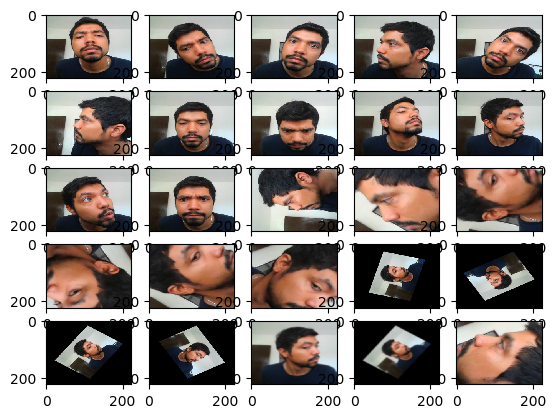

In [17]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(xx)))

# Visualiza la información ploteando las imágenes
fig,ax = plt.subplots(5,5) 
k = 0
for i in range(5): 
    for j in range(5): 
        ax[i][j].imshow(xx[k].reshape(224,224,3), aspect='auto') 
        k += 1
plt.show() 

<h3>Estructura de la red</h3>

In [19]:
# Tensores de Entrada y salida
x = tf.placeholder(tf.float32, [None, alto,ancho,canales])
x_images = tf.reshape(x, [-1,alto,ancho,canales])
y_ = tf.placeholder(tf.float32, [None, salidas])

bloque1 = rna.conv_layer(3,[canales,16,16])
bloque2 = rna.conv_layer(3,[16,32,32])
bloque3 = rna.conv_layer(3,[32,64,64])
bloque4 = rna.conv_layer(3,[64,128,128])
bloque5 = rna.conv_layer(3,[128,128,128])
fully_connected = rna.fc_layer([7*7*128,512,256,salidas])

b1 = bloque1.compute_layer(inputs=x_images)
b2 = bloque2.compute_layer(inputs=b1)
b3 = bloque3.compute_layer(inputs=b2)
b4 = bloque4.compute_layer(inputs=b3)
b5 = bloque5.compute_layer(inputs=b4)
fc = fully_connected.compute_layer(b5)

prediction = tf.nn.softmax(fc)

# Función de costo
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=fc)) 

# Tasa de aprendizaje
global_step = tf.Variable(0, trainable=False)
tasa_inicial = 0.001
pasos = 10
tasa = tf.train.exponential_decay(tasa_inicial, global_step, pasos, 0.96, staircase=True)

# Optimizador 
optimizer = tf.train.AdamOptimizer(tasa).minimize(loss,global_step=global_step)

sess = tf.Session()
# Inicialización de pesos y bias
sess.run(tf.global_variables_initializer())

<h3>Rutina de entrenamiento</h3>

Initialized
Número total de iteraciones: 100
Tasa final: 0.0006648325
Error final: 0.05887063
Exactitud de entrenamiento: 99.65277777777777 %
Exactitud de validación: 93.33333333333333 %
Exactitud de test: 88.88888888888889 %
Tiempo total empleado: 99 minuto(s) y  34.62863999999854 segundo(s)


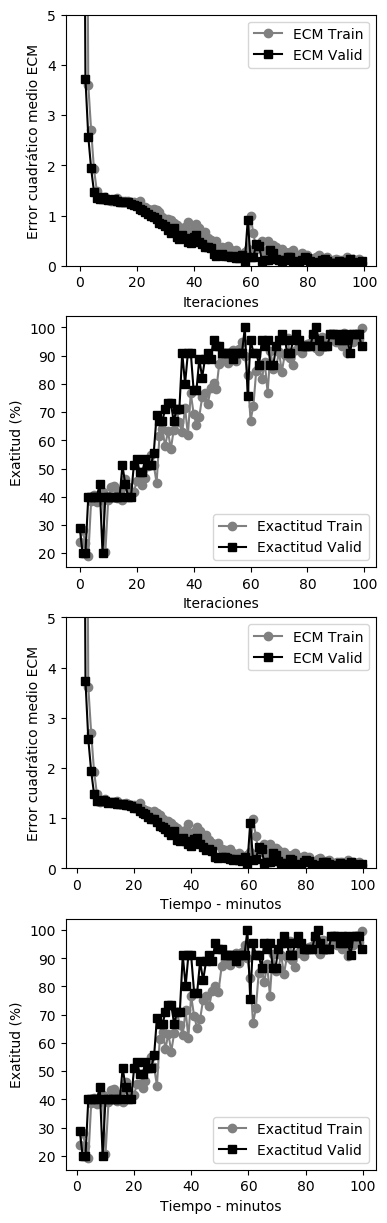

In [20]:
errors=[]
errors_v=[]
accuracys=[]
accuracys_v=[]
batch_size=288
epochs=20
num_steps=len(xx)//batch_size*epochs
print("Initialized") 
print("Número total de iteraciones: "+str(num_steps))

time=[]
initial_s = float(datetime.datetime.now().strftime('%S.%f'))
initial_m = float(datetime.datetime.now().strftime('%M.%f')[:-7])
initial_h = float(datetime.datetime.now().strftime('%H.%f')[:-7])
initial_time = initial_h*60+initial_m+initial_s/60

for step in range(num_steps): 
  
    # Preparación del feed_dict
    x_batch, y_batch = rna.random_batch(xxx,ddd,batch_size)
    #x_batch_v, y_batch_v = rna.random_batch(xxx_v,ddd_v,batch_size)
    feed_dict = {x: x_batch, y_: y_batch} 
    #feed_dict_v = {x: x_batch_v, y_: y_batch_v} 

    # Corre un paso de computación
    _, l, predictions = sess.run([optimizer, loss, prediction], feed_dict=feed_dict)
    
    # Almacena el error del bache de Entrenamiento
    errors.append(l)
    
    # Almacena el porcentaje de exactitud de Entrenamiento
    #accuracys.append(rna.accuracy(sess.run(prediction, feed_dict={x:xxx,y_:ddd}),ddd))    
    accuracys.append(rna.accuracy(predictions,y_batch))   
    
    # Almacena el porcentaje de exactitud de Validación
    l_v, predictions_v = sess.run([loss,prediction], feed_dict={x:xxx_v,y_:ddd_v})
    errors_v.append(l_v)
    accuracys_v.append(rna.accuracy(predictions_v,ddd_v))
    #l_v, predictions_v = sess.run([loss,prediction], feed_dict=feed_dict_v)
    #errors_v.append(l_v)
    #accuracys_v.append(rna.accuracy(predictions_v,y_batch_v))
    print("Iteración actual # "+str(step),end='\r')
    
    time_sec_now = float(datetime.datetime.now().strftime('%S.%f'))
    time_min_now = float(datetime.datetime.now().strftime('%M.%f')[:-7])
    time_hor_now = float(datetime.datetime.now().strftime('%H.%f')[:-7])
    time_now = (time_hor_now*60+time_min_now+time_sec_now/60)-initial_time
    
    time.append(time_now)
    
total_time = time[num_steps-1]

# Almacena el porcentaje de exactitud de Test
accuracys_t = rna.accuracy(sess.run(prediction,feed_dict={x:xxx_t,y_:ddd_t}),ddd_t)

print("Tasa final: "+str(sess.run(tasa)))
print("Error final: "+str(l))
print("Exactitud de entrenamiento: "+str(accuracys[num_steps-1])+str(" %"))
print("Exactitud de validación: "+str(accuracys_v[num_steps-1])+str(" %"))
print("Exactitud de test: "+str(accuracys_t)+str(" %"))

f, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(4,15))

ax1.plot(errors,label='ECM Train',marker='o',color="gray")
ax1.plot(errors_v,label='ECM Valid',marker='s',color="k")
ax1.set_ylim([0,5])
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('Error cuadrático medio ECM')
leg = ax1.legend();

ax2.plot(accuracys,label='Exactitud Train',marker='o',color="gray")
ax2.plot(accuracys_v,label='Exactitud Valid',marker='s',color="k")
ax2.set_xlabel('Iteraciones')
ax2.set_ylabel('Exatitud (%)')
leg = ax2.legend();

ax3.plot(time,errors, label='ECM Train',marker='o',color="gray")
ax3.plot(time,errors_v,label='ECM Valid',marker='s',color="k")
ax3.set_ylim([0,5])
ax3.set_xlabel('Tiempo - minutos')
ax3.set_ylabel('Error cuadrático medio ECM')
leg = ax3.legend();

ax4.plot(time,accuracys,label='Exactitud Train',marker='o',color="gray")
ax4.plot(time,accuracys_v,label='Exactitud Valid',marker='s',color="k")
ax4.set_xlabel('Tiempo - minutos')
ax4.set_ylabel('Exatitud (%)')
leg = ax4.legend();

print("Tiempo total empleado:",int(total_time),"minuto(s) y ",(abs(total_time)-abs(int(total_time)))*60,"segundo(s)")


<h3>Cálculo de la exactitud de la red</h3>

Cara: 0.10511890286579728% | Cuerpo: 0.0007294619990716456% | Mano: 99.81729984283447% | Nada: 0.07685285527259111%


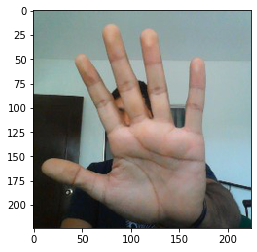

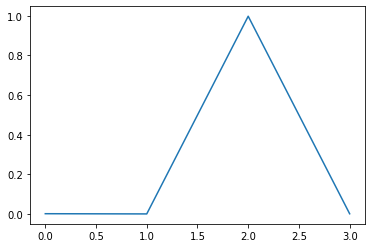

In [12]:
i=20
imagen = xxx_t[i]
x_ = np.float32(imagen)
pred_o=sess.run(prediction, feed_dict={x:[x_]})
pred_i = np.argmax(pred_o)
print("Cara: "+str(pred_o[0,0]*100)+"% | Cuerpo: "+str(pred_o[0,1]*100)+"% | Mano: "+str(pred_o[0,2]*100)+"% | Nada: "+str(pred_o[0,3]*100)+"%") 
plt.imshow(xxx_t[i]/255)
plt.show()
test=sess.run(prediction, feed_dict={x:[xxx_t[i]]})
plt.plot(test[0])

In [13]:
preds = sess.run(prediction, feed_dict={x: xxx_t, y_: ddd_t})
preds = np.argmax(preds, axis=1)

trueLabels = np.argmax(dd_t, axis=1)

errors = 0.

for i in range(preds.shape[0]):
    if preds[i] != trueLabels[i]:
        if i < 0:
            plt.imshow(xxx_t[i,:,:,:]/255)
            print(i)
            plt.show()
        errors = errors +1
        
print('Test errors: '+str(errors/preds.shape[0]*100)+'%')

Test errors: 2.2222222222222223%


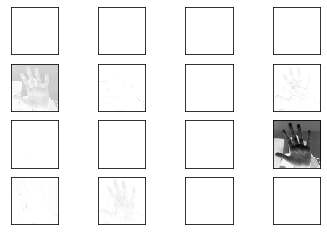

In [14]:
rna.plot_layer_output(bloque1.relu,xxx_t[20],sess,x)

(1, 224, 224)

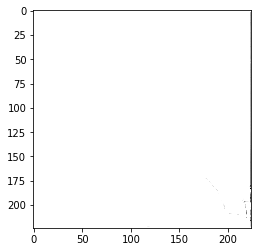

In [15]:
imagen = sess.run(bloque1.relu,feed_dict={x:[xxx_t[25]]})
plt.imshow(imagen[0,:,:,10],cmap='binary')
imagen.shape
imagen[:,:,:,1].shape